<a href="https://colab.research.google.com/github/PKvasnick/RTutorial/blob/master/code/R03_Vizualiz%C3%A1cia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vizualizácia, 1. časť

Už sme kreslili grafy príkazmi *plot* a *lines*. To je štandardná funkcionalita R, ale nie je úplne pohodlná na používanie. 

V tejto časti sa zoznámime z prvým z balíkov zo skupiny *tidyverse*: je to kresliaci balík __ggplot2__. 

__ggplot2__ je výnimočný svojou funkcionalitou, kvalitou výstupu a osobitou filozofiou. Ako so všetkým v R, budete si chvíľu zvykať, ale sľubujem, že to, čo získate na prvý pokus, bude vždy o niekoľko tried lepšie ako prvý pokus o graf v Exceli.

In [22]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Neznepokojujeme sa výstrahami o konfliktoch. *tidyverse* predefinuje niektoré veci v R, ale to nás nemusí znepokojovať. 

### Dátový súbor __mpg__

Dátový súbor __mpg__ je súčasťou balíka *ggplot2*, teda plným menom __ggplot2::mpg__, keby sme sa obávali konfliktu názvov. Dátový súbor obsahuje merania spotreby automobilov, vykonané americkou *Environment Protection Agency* (EPA) na 234 typoch automobilov v rokoch 1999-2008. 


In [23]:
help(mpg)
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Prvý graf
Dojazd na jeden galón (hwy) v závislosti od objemu motora


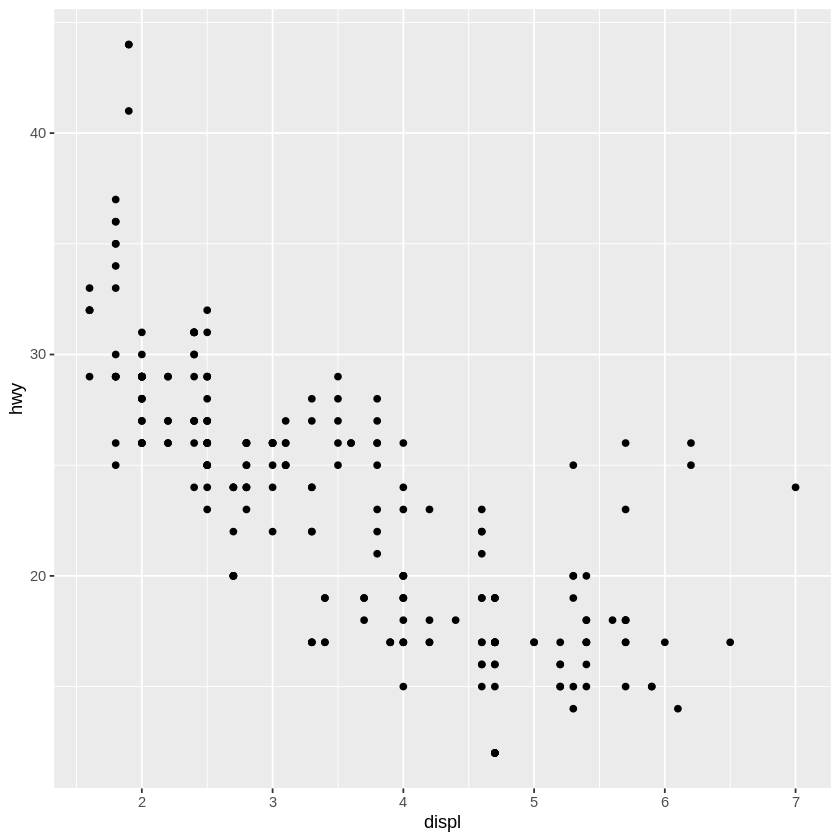

In [24]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

Vidím negatívnu závislosť medzi objemom motora a dojazdom. Teda autá s väčším motorom prejd na 1 galón menšiu vzdialenosť ako menšie autá. 

__ggplot()__ vytvorí súradnicový systém a prázdny graf. 

__geom_xxx()__ pridávajú do grafu jednu alebo niekoľko vrstiev objektov. __geom_point__ pridá vrstvu s bodmi grafu. 

Každá funkcia __geom_xxx__ vyžaduje ako argument priradenie (mapping) vlastností (stĺpcov) dát k vizuálnym (estetickým) prvkom grafu (odtiaľ __aes()__), ako sú polohy bodov,farba, veľkosť a tvar symbolov, farba výplní, čiar a podobne. V našom prípade sme priradili __displ__ x-ovej a __hwy__ y-ovej súradnici bodov na grafe.

Všeobecný predpis je 

`ggplot(data = \<DATA\>) + \<GEOM_FUNKCIA\>(mapping = aes(\<PRIRADENIA\))`

__Úlohy__

1. Spustite `ggplot(data = mpg)` bez `geom_xxxx()`. Čo vidíte?

2. Koľko stĺpcov a riadkov má súbor __mtcars__?

3. Aký význam má stĺpec __mpg$drv__?

4. Nakreslite graf __hwy__ v závislosti od __cyl__.

5. Nakreslite graf __class__ v závislosti od __drv__. Je to užitočný graf?

Poďme vyskúšať nejaké zaujímavejšie priradenia.


### Zložitejšie priradenia

V našom grafe mám zobrazené dve vlastnosti áut zo súboru __mpg__: objem motora a vzdialenosť, ktorú auto prejde na 1 galón paliva. Prvky grafu - v našom prípade body - majú ešte ďalšie vlastnosti, napríklad veľkosť, tvar, farbu, ktorým môžeme priradiť ďalšie stĺpce súboru __mpg__ a tak súčasne zobraziť vv grafe viac ako 2 parametre. 

Predstavme si, že nás zaujíma, či sa niektoré triedy áut nevyskytujú v našom grafe v anomálnych polohách. Vezmime stĺpec __class__ a priraďme jej úrovne (pretože to je kvalitatívna premenná) farbe bodov v grafe.


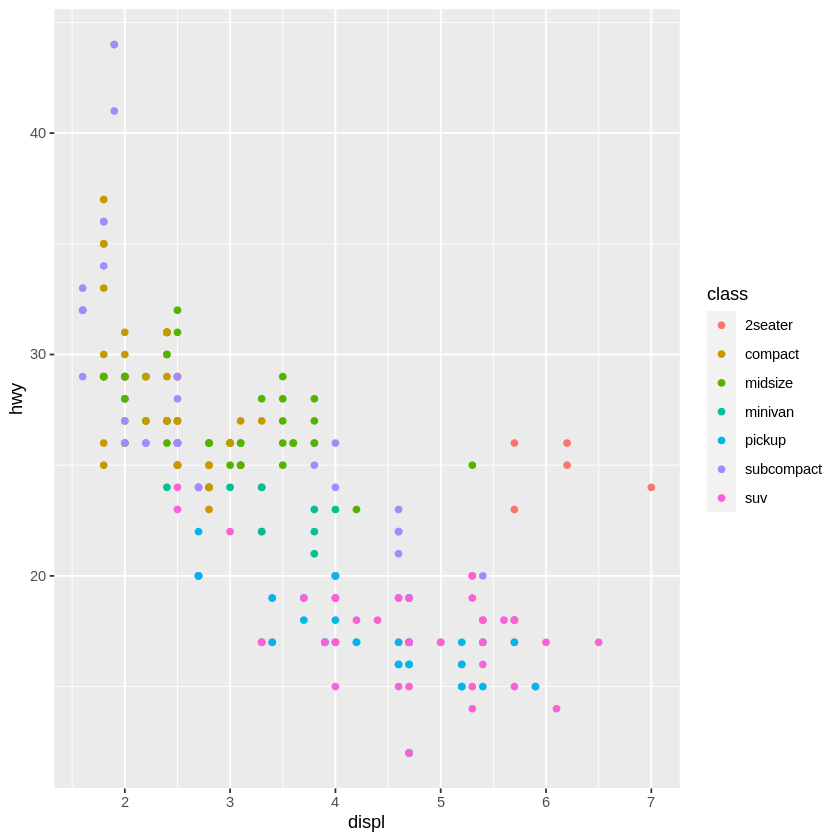

In [25]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = class))

Vidíme, že ggplot vybral farby pre triedy áut a vytvoril ku grafu aj legendu. 

Tiež vidíme, že 5 zo šiestich áut nad hlavnou krivkou vpravo dole sú športové autá - majú veľký motor, ale sú oveľa ľahšie ako SÚV s podobne veľkým motorom. Pretože to sú *premotorované* autá, vymykajú sa z typickej závislosti.

__Úlohy__ 

1. Skúste priradiť __class__ veľkosti symbolov v grafe (size = class). Funguje? Je to dobrý nápad?

2. Ďalšie estetiky, ktorým môžete priradiť __class__ sú sýtosť (__alpha__) zafarbenia bodov a tvar (__shape__) bodov. Vyskšajte a posúďte.

Vlastnosti grafu môžeme nastaviť aj manuálne. Napríklad môžeme predpísať veľkosť bodov:

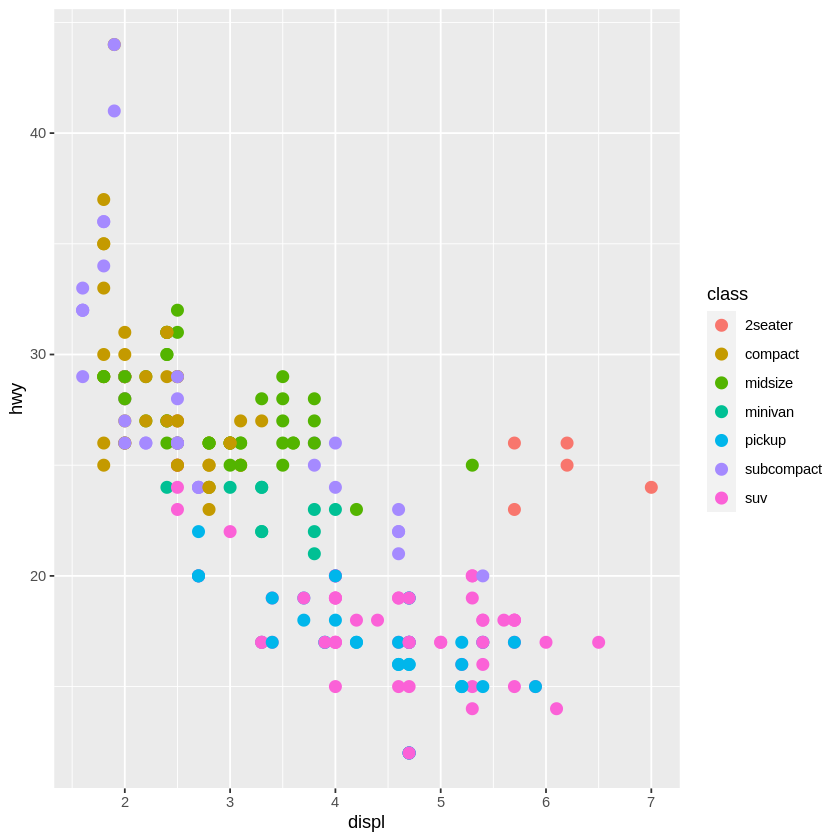

In [26]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = class), size = 3)

Takto predpísané vlastnosti neurčujú vlastnosti mapovania, iba celkový výzor grafu. Farby predpisujeme ako znakový reťazec ("red"), veľkosť bodov v milimetroch a tvar bodov ako kód tvaru z tabuľky tvarov (napríklad *http://www.sthda.com/english/wiki/ggplot2-point-shapes*).

__Úlohy__

1. Ktoré zo stĺpcov __mpg__ sú spojité, a ktoré kategoriálne? Ako to spoľahlivo zistíme?

2. Ako sa správa priradenie premennej veľkosti, farbe a tvaru (colour, size, shape) pre spojité a kategoriálne premenné? Preskúmajte.

3. Čo sa stane, ak priradíte estetiku niečomu inému ako dátovému stĺpcu, napríklad __color = displ < 5__?


### Čo keď to nefunguje?

Neprepadajte panike. 

* Nemáte v kóde nejaké divné značky od syntax highlightera? 

* Máte chybovú hlášku? Hurá, skúste pochopiť, čo hovorí, alebo ju celú skopírujte do prehliadača a Google raď.

* Nič sa nestalo? Pozrite sa, či ste zle nerozdelili viacriadkový príkaz. R musí chápať, že riadok pokračuje, takže ak je medzi dvoma časťami napríklad __+__, musí byť na konci riadku pred zalomením, a nie na začiatku ďalšieho riadku. 

* Skúste help k funkcii, ktorú používate (__help(geom_point)__ alebo __?geom_point__)



### Fazety - __Facets__

Ešte jeden spôsob, ako pridať do grafu ďalšie premenné, je rozdeliť graf do viacerých "faziet" a v každej zobraziť iba podmnožinu dát. Pre takéto delenie je vhodné pouužiř kategoriálne dáta.

Ak takto chceme rozdeliť náš graf podľa (jednej, diskrétnej) premennej, použijeme funkciu __facet_wrap__:

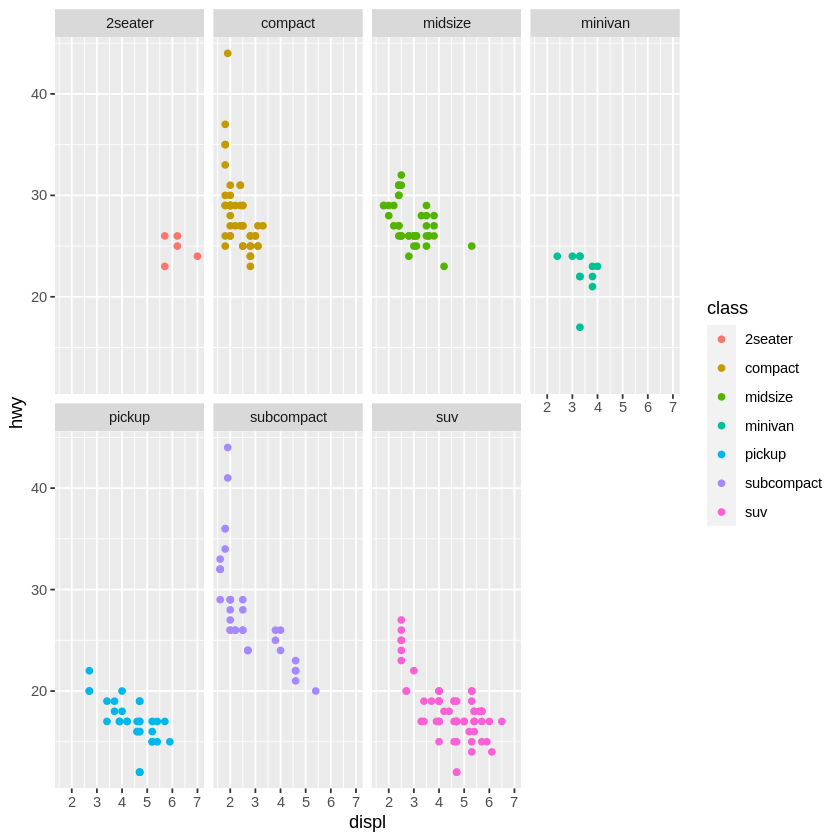

In [27]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = class)) +
  facet_wrap(~ class, nrow = 2)

Môžeme rozdeľovať aj podľa dvoch premenných, v tomto prípade použijeme funkciu __facet_grid__:


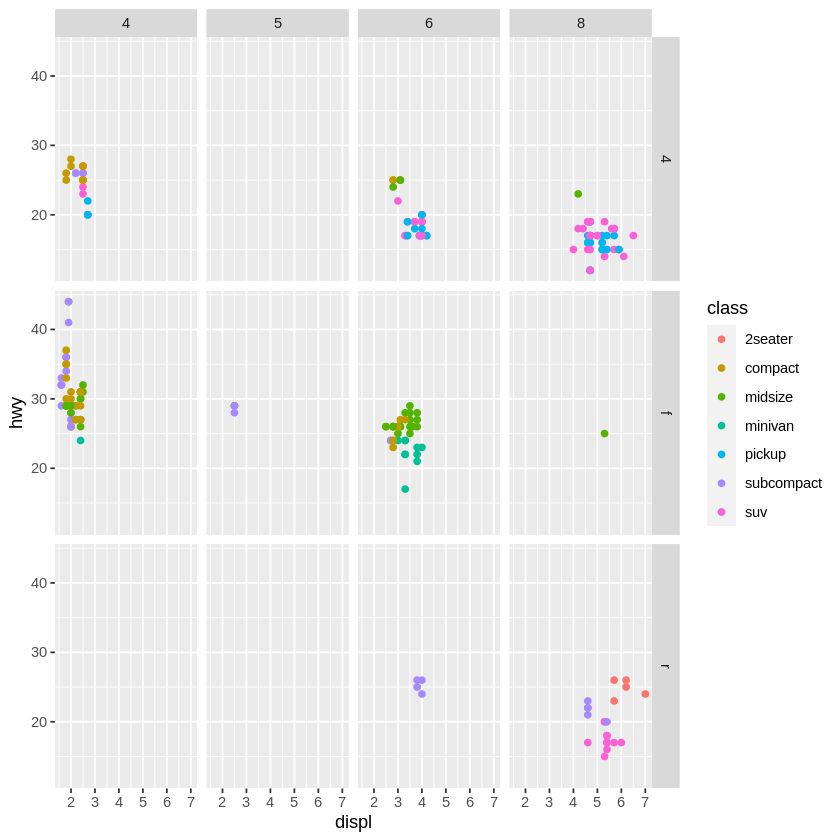

In [28]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = class)) +
  facet_grid(drv ~ cyl)

Ak nechcete deliť podľa stĺpcovej alebo riadkovej premennej, použite namiesto nej bodku: __. ~ cyl__
